#Daftar Library yang Dibutuhkan

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

#Mengambil data set 'Semua Statistik Pemain Aktif Liga Inggris Semua Musim Tahun 2020' dari Google Drive


Dataset ini dibuat oleh akun Kaggle 'Rishikesh Kanabar' · yang diunggah 3 tahun yang lalu

Dataset ini diperoleh dari: https://www.premierleague.com/

Pembuat melakukan Scrapper Web BeautifulSoup4 di Python3 yang secara otomatis menampilkan file csv dari semua statistik pemain. Pembuat melakukan program ini agar dataset ini dapat diperbarui setiap minggu. Alasan pembaruan mingguan adalah statistik berubah setelah setiap pertandingan dimainkan oleh pemain, jadi pembuat merasa bahwa untuk hasil yang paling mutakhir.

Dataset ini kami unduh dari website kaggle dengan link sebagai berikut:
LINK : https://www.kaggle.com/datasets/rishikeshkanabar/premier-league-player-statistics-updated-daily

In [2]:
data = pd.read_csv('/content/drive/MyDrive/FP BIG DATA/dataset/dataset - 2020-09-24.csv')
df = pd.DataFrame(data)
df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


#Deskripsi dari Dataset

In [3]:
df.shape #melihat Jumalah baris dan kolom dari dataset (Baris = 571, Kolom = 59)

(571, 59)

In [4]:
df.head() #melihat 5 baris data pertama dari dataset

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [5]:
df.columns #daftar list kolom yang terdapat di dataset

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [6]:
df.describe() #deskripsi keseluruhan dataset

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


#Membuat Dataframe baru untuk memberi nilai 'Nol' pada data yang kosong 'NaN'
hal ini perlu dilakukan karena Linier Regresi membutuhkan data real untuk melakukan prediksi RMSE

In [7]:
dfbaru = df.fillna(0)
dfbaru

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,0.0,0.0,0.0,0.0,0.0,0.0,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0


#Melihat Korelasi Kuat Kemenangan Dari Data untuk membuat tabel baru
- Pada bagian ini maka kami perlu melihat data yang kuat untuk mempengaruhi kemenangan di liga inggris.
-  Kemudian memilih Kolom yang akan kita gunakan untuk proses analisis ke dalam data frame baru yaitu dfJersey

<ipython-input-8-800280eb61d3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfbaru.corr()


<Axes: >

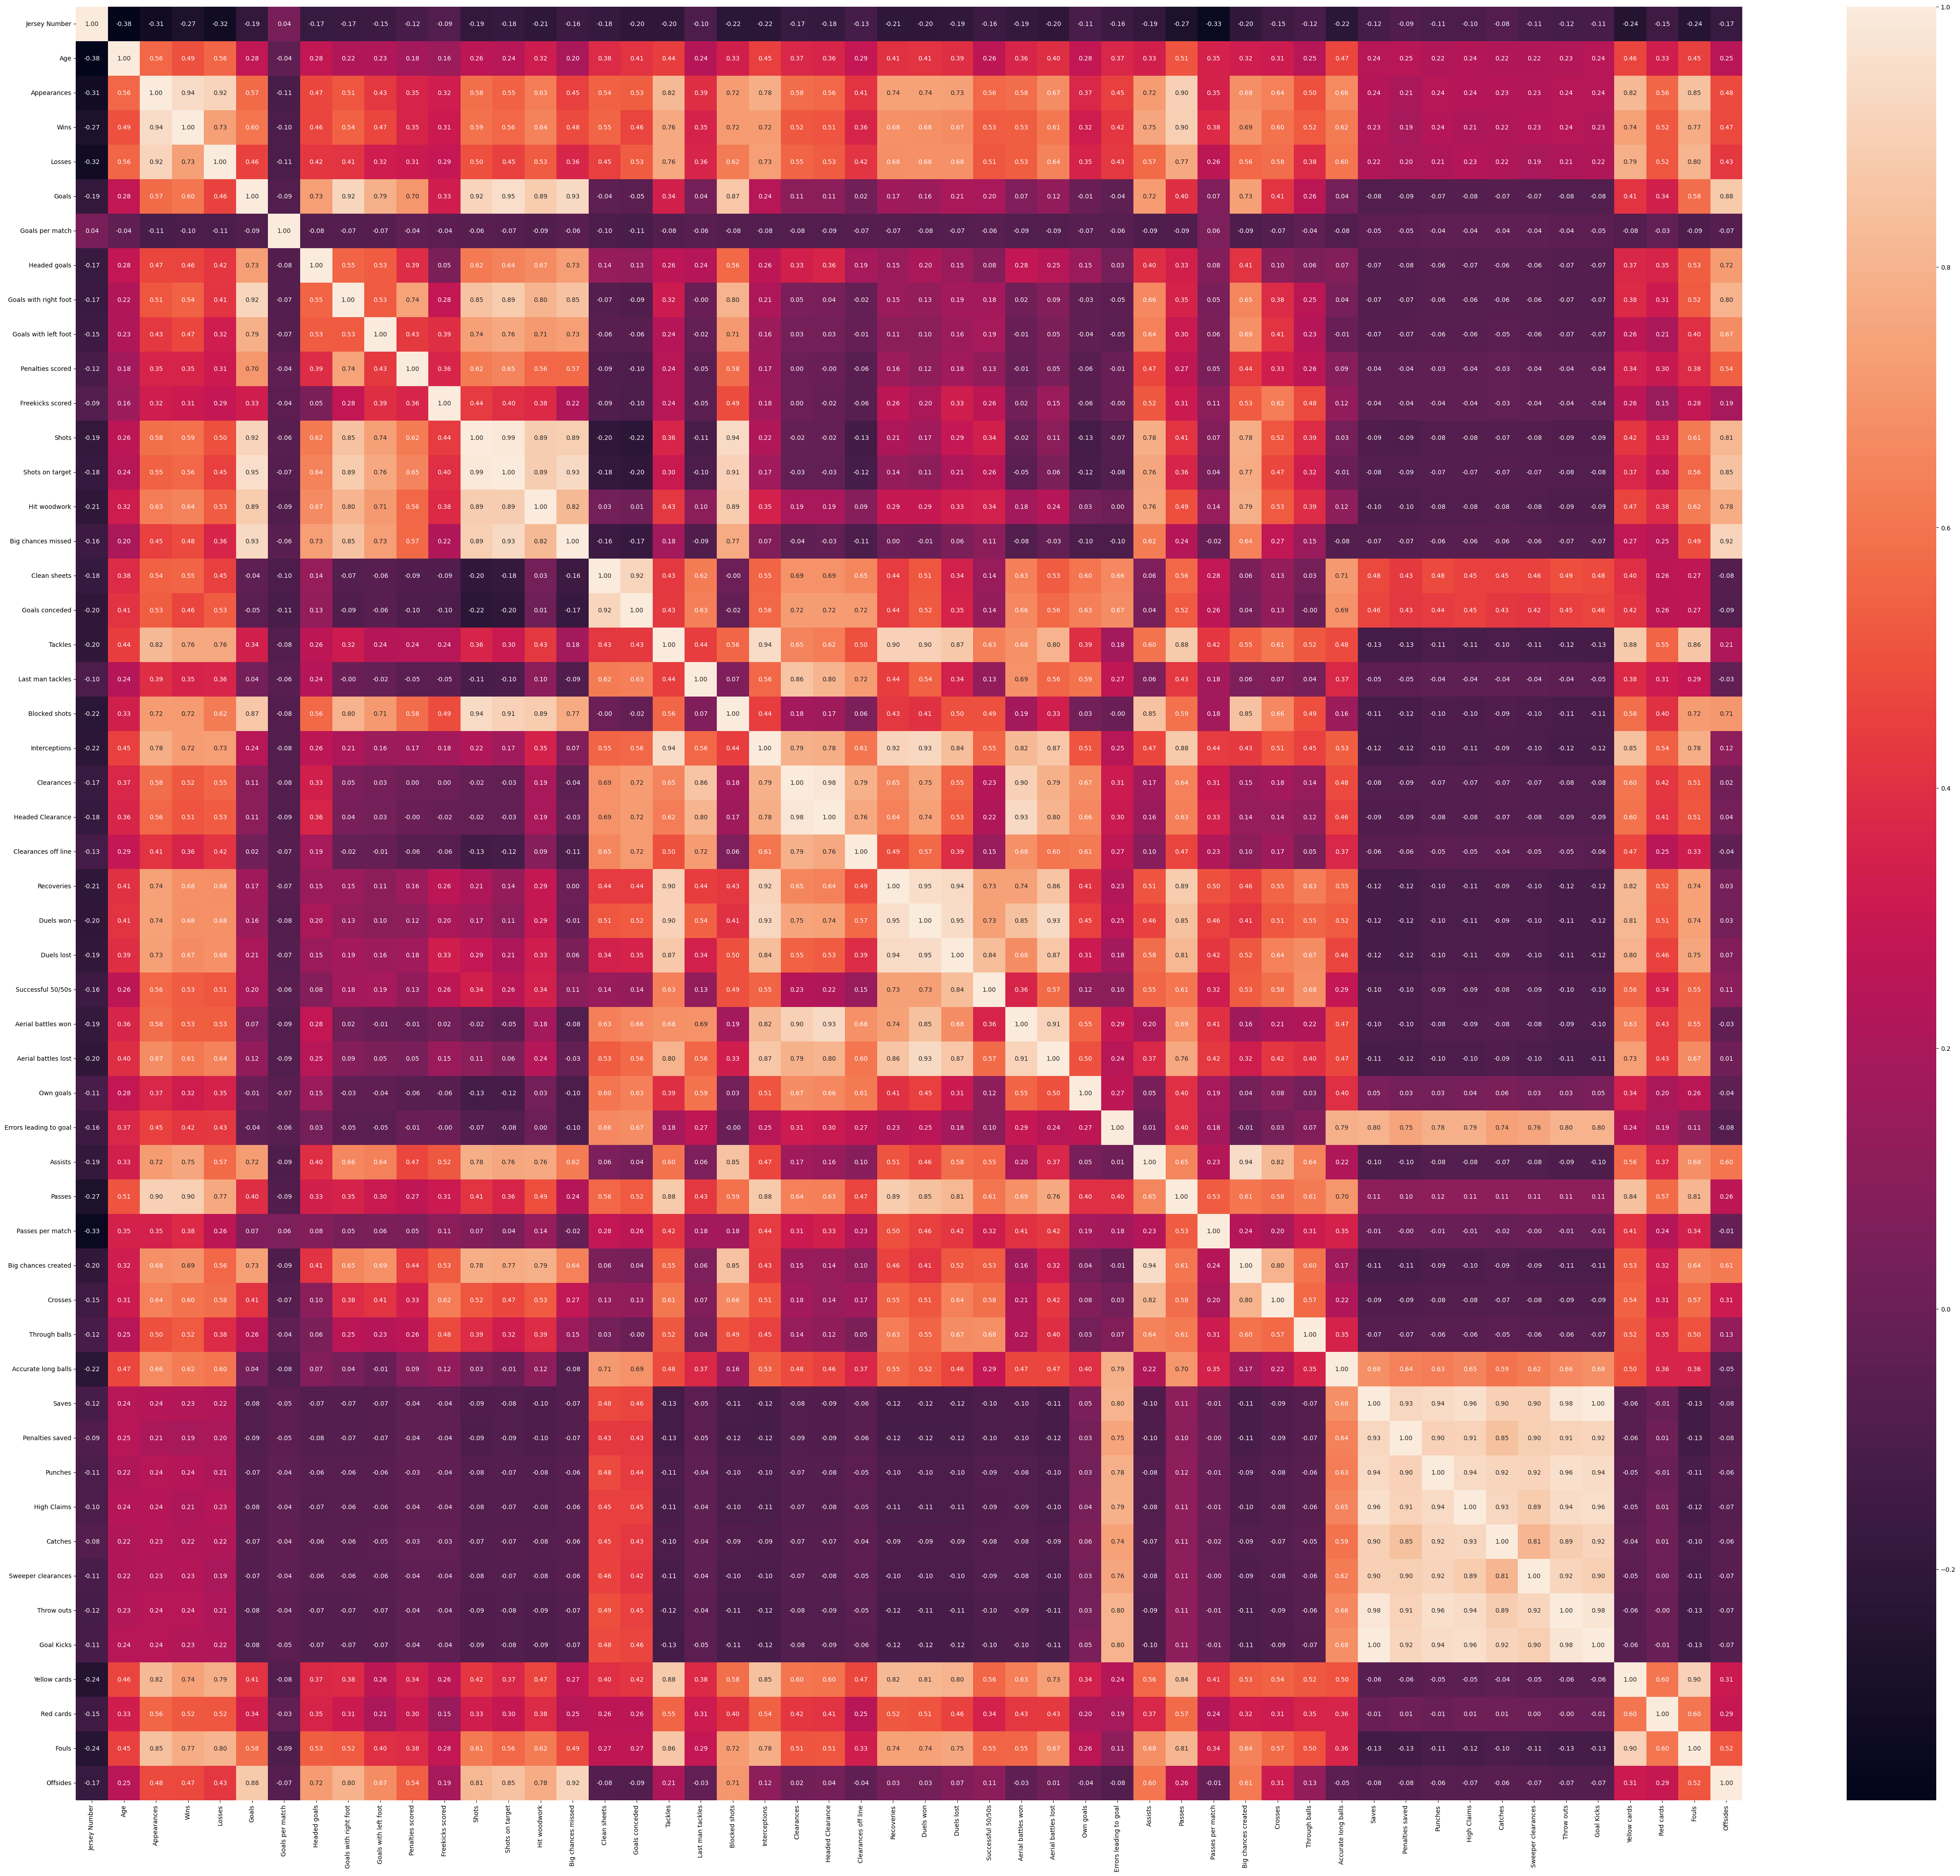

In [8]:
plt.figure(figsize=(60,52))

corr = dfbaru.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

#Membuat Data Frame Baru dfJersey

In [9]:
dfJersey = dfbaru[['Name','Jersey Number','Club','Appearances','Wins','Goals','Assists','Shots','Passes','Big chances created','Interceptions','Yellow cards','Tackles','Blocked shots','Fouls']]
dfJersey

,Name,Jersey Number,Club,Appearances,Wins,Goals,Assists,Shots,Passes,Big chances created,Interceptions,Yellow cards,Tackles,Blocked shots,Fouls
0,Bernd Leno,1.0,Arsenal,64,28,0,0,0.0,1783,0.0,0.0,2,0.0,0.0,0
1,Matt Macey,33.0,Arsenal,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
3,Héctor Bellerín,2.0,Arsenal,160,90,7,18,0.0,7125,28.0,208.0,23,214.0,32.0,125
4,Kieran Tierney,3.0,Arsenal,16,7,1,1,0.0,519,1.0,12.0,2,21.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,31,14,3,4,19.0,399,5.0,9.0,3,11.0,7.0,16
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,78,32,32,13,237.0,2108,26.0,43.0,7,51.0,53.0,81
568,Adama Traoré,37.0,Wolverhampton-Wanderers,105,27,5,12,78.0,1434,13.0,27.0,4,86.0,26.0,80
569,Fábio Silva,17.0,Wolverhampton-Wanderers,1,0,0,0,0.0,1,0.0,0.0,0,0.0,0.0,0


#EDA
*   Analisis Pemain Berdasarkan Nomor Punggung
*   Melihat Pemain dengan kontribusi kemenangan terbanyak di liga inggris






##Analisis Pemain

In [10]:
dfbaru['Jersey Number'].unique()

array([ 1., 33., 13.,  2.,  3.,  4.,  5., 16., 20., 21., 23., 31.,  6.,
       10., 11., 15., 25., 28., 29., 32., 34.,  7.,  8.,  9., 14., 19.,
       24., 30., 35., 12., 26., 18., 22., 27., 17., 41., 39.,  0., 52.,
       50., 58., 49., 53., 55., 42., 37., 45., 44., 40., 47., 36., 43.,
       46., 38., 62., 73., 66., 76., 72., 59., 67., 69., 82., 48., 71.,
       54., 56., 57.])

In [35]:
jersey_num_means = dfJersey.groupby('Jersey Number').agg(np.mean)

<ipython-input-35-6dcdcdcd2681>:1: FutureWarning: The operation <function mean at 0x7ed31cf45990> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  jersey_num_means = dfJersey.groupby('Jersey Number').agg(np.mean)


In [36]:
jersey_num_means

,Appearances,Wins,Goals,Assists,Shots,Passes,Big chances created,Interceptions,Yellow cards,Tackles,Blocked shots,Fouls
Jersey Number,,,,,,,,,,,,
0.0,5.875000,1.500000,0.250000,0.125000,2.125000,140.625000,0.125000,0.250000,0.250000,1.250000,0.875000,0.625000
1.0,119.500000,52.000000,0.000000,0.250000,0.000000,3182.000000,0.000000,0.000000,2.937500,0.000000,0.000000,1.250000
2.0,76.388889,33.500000,2.888889,5.222222,0.000000,3223.555556,7.111111,116.444444,12.666667,142.333333,10.388889,66.666667
3.0,90.625000,37.125000,4.125000,5.312500,1.812500,3372.687500,8.625000,134.000000,11.562500,153.437500,15.250000,63.500000
4.0,78.500000,33.333333,4.833333,2.277778,23.222222,3556.833333,4.333333,114.222222,10.055556,119.388889,12.277778,61.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
71.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
jersey_num_means['Wins'] = jersey_num_means['Wins'].fillna(0)

Text(5, 52, 'Total Wins by Jersey Number')

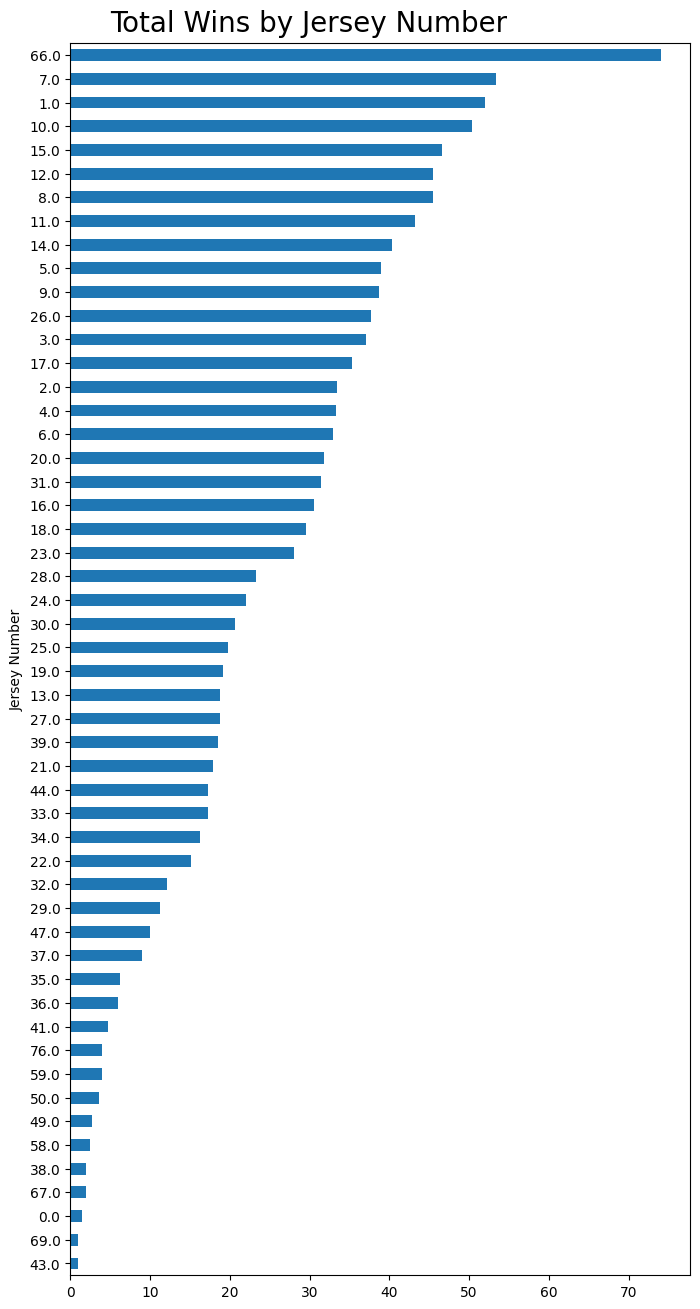

In [13]:
jersey_num_means['Wins'][jersey_num_means['Wins'] > 0].sort_values().plot(kind='barh', figsize=(8,16))
plt.text(x=5, y=52, s='Total Wins by Jersey Number', fontsize=20)

In [14]:
dfJersey[dfJersey['Jersey Number'] == 66] #Mencari informasi pemain bernomor punggung '66'

,Name,Jersey Number,Club,Appearances,Wins,Goals,Assists,Shots,Passes,Big chances created,Interceptions,Yellow cards,Tackles,Blocked shots,Fouls
295,Trent Alexander-Arnold,66.0,Liverpool,95,74,6,26,0.0,5323,32.0,114.0,11,158.0,27.0,50


In [15]:
dfJersey[dfJersey['Jersey Number'] == 7] #Mencari informasi pemain bernomor punggung '7'

,Name,Jersey Number,Club,Appearances,Wins,Goals,Assists,Shots,Passes,Big chances created,Interceptions,Yellow cards,Tackles,Blocked shots,Fouls
21,Bukayo Saka,7.0,Arsenal,28,11,1,5,15.0,716,6.0,12.0,6,36.0,5.0,22
45,John McGinn,7.0,Aston-Villa,29,7,3,3,57.0,759,3.0,26.0,4,53.0,12.0,38
88,Aaron Connolly,7.0,Brighton-and-Hove-Albion,26,8,4,1,43.0,161,1.0,0.0,0,8.0,14.0,17
105,Jóhann Gudmundsson,7.0,Burnley,96,28,7,17,114.0,1750,12.0,91.0,5,93.0,32.0,41
130,N'Golo Kanté,7.0,Chelsea,166,98,10,10,120.0,8952,15.0,420.0,22,540.0,46.0,218
158,Max Meyer,7.0,Crystal-Palace,46,11,1,2,47.0,864,0.0,22.0,4,52.0,14.0,16
196,Richarlison,7.0,Everton,111,41,31,10,280.0,2452,22.0,53.0,17,190.0,80.0,114
217,Neeskens Kebano,7.0,Fulham,9,0,0,0,0.0,57,0.0,0.0,0,3.0,1.0,3
250,Ian Poveda-Ocampo,7.0,Leeds-United,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
268,Demarai Gray,7.0,Leicester-City,132,53,10,9,138.0,1920,13.0,39.0,7,76.0,45.0,36


In [16]:
df_sort_wins = dfJersey.sort_values(by='Wins', ascending=False) #Melihat statistik pemain
df_sort_wins

,Name,Jersey Number,Club,Appearances,Wins,Goals,Assists,Shots,Passes,Big chances created,Interceptions,Yellow cards,Tackles,Blocked shots,Fouls
302,James Milner,7.0,Liverpool,539,272,55,84,496.0,16171,46.0,437.0,65,803.0,174.0,438
304,Jordan Henderson,14.0,Liverpool,342,185,30,46,344.0,17932,49.0,437.0,34,673.0,98.0,299
324,Kyle Walker,2.0,Manchester-City,293,183,7,29,0.0,15694,25.0,498.0,45,600.0,55.0,239
344,Sergio Agüero,10.0,Manchester-City,263,177,180,46,996.0,6134,59.0,73.0,23,150.0,230.0,167
198,Theo Walcott,11.0,Everton,346,176,75,51,616.0,5491,61.0,149.0,10,214.0,141.0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Pascal Struijk,21.0,Leeds-United,1,0,0,0,0.0,59,0.0,3.0,0,4.0,0.0,0
235,Leif Davis,24.0,Leeds-United,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
237,Oliver Casey,49.0,Leeds-United,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0
238,Charlie Cresswell,35.0,Leeds-United,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0


In [17]:
dfJersey[dfJersey['Name'] == 'Kevin De Bruyne']

,Name,Jersey Number,Club,Appearances,Wins,Goals,Assists,Shots,Passes,Big chances created,Interceptions,Yellow cards,Tackles,Blocked shots,Fouls
335,Kevin De Bruyne,17.0,Manchester-City,156,109,37,67,367.0,8407,97.0,88.0,14,214.0,97.0,122


# Korelasi Prediksi Kemenangan

**Korelasi Antar Kolom Pada Dataframe dfJersey** <br>
pada tahap ini kami memulai uji korelasi kolom 'Wins' pada dataframe dfJersey untuk menganilisis kolom apa saja yang dapat mempengaruhi kemenangan di Liga Inggris



##Ploting korelasi antar kolom menggunakan scatterplot

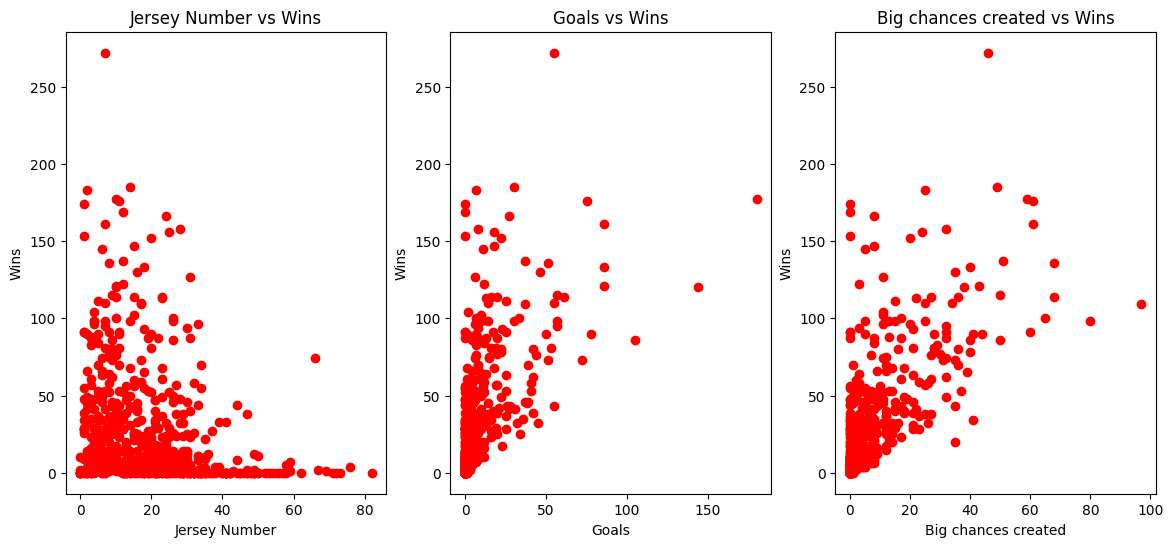

In [39]:
#korelasi kemenangan dari 3 kolom lain yaitu Jersey Number, Goals, Big chances creaeted
plt.figure(figsize=(24, 6))  # Ukuran grafik


plt.subplot(1, 5, 1)
plt.title('Scatter Plot')
plt.scatter(dfJersey['Jersey Number'], dfJersey['Wins'], color='red', marker='o')
plt.xlabel('Jersey Number')
plt.ylabel('Wins')
plt.title('Jersey Number vs Wins')

plt.subplot(1, 5, 2)
plt.title('Scatter Plot')
plt.scatter(dfJersey['Goals'], dfJersey['Wins'], color='red', marker='o')
plt.xlabel('Goals')
plt.ylabel('Wins')
plt.title('Goals vs Wins')

plt.subplot(1, 5, 3)
plt.scatter(dfJersey['Big chances created'], dfJersey['Wins'], color='red', marker='o')
plt.xlabel('Big chances created')
plt.ylabel('Wins')
plt.title('Big chances created vs Wins')

plt.show()

<ipython-input-19-e6954915c515>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(dfJersey, ax=ax)


<Figure size 640x480 with 0 Axes>

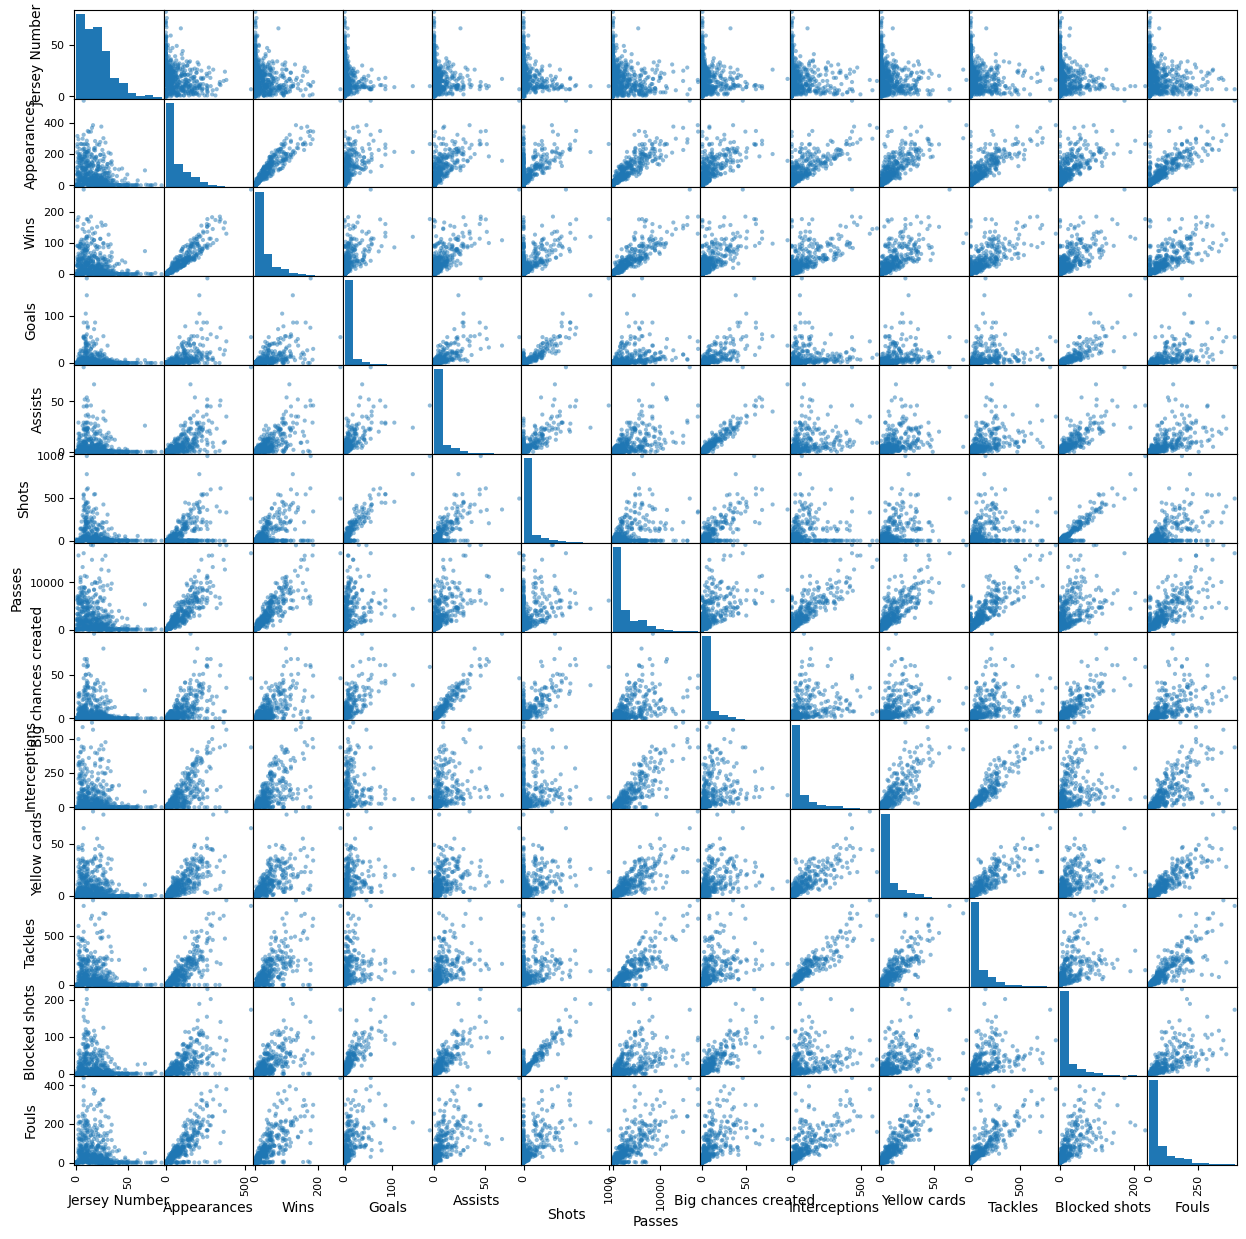

In [19]:
#Korelasi keseluruhan antar kolom bernilai
plt.clf()

_, ax = plt.subplots(1, 1, figsize=(15,15))
scatter_matrix(dfJersey, ax=ax)
plt.show()

##Melihat nilai korelasi kuat antar tabel

*   Target : Wins
*   Relasi : Goals, Assists, Shots, Interceptions, Yellow cards, Tackles ,Blocked shots

kami memilih relasi tersebut karena keseruan liga inggris terdapat pada gaya bermain yang saling menyerang dan bertahan dengan strategi masing-masing tim untuk meraih kemenangan.


<ipython-input-38-6b3a1b529f38>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfJersey.corr()


<Axes: >

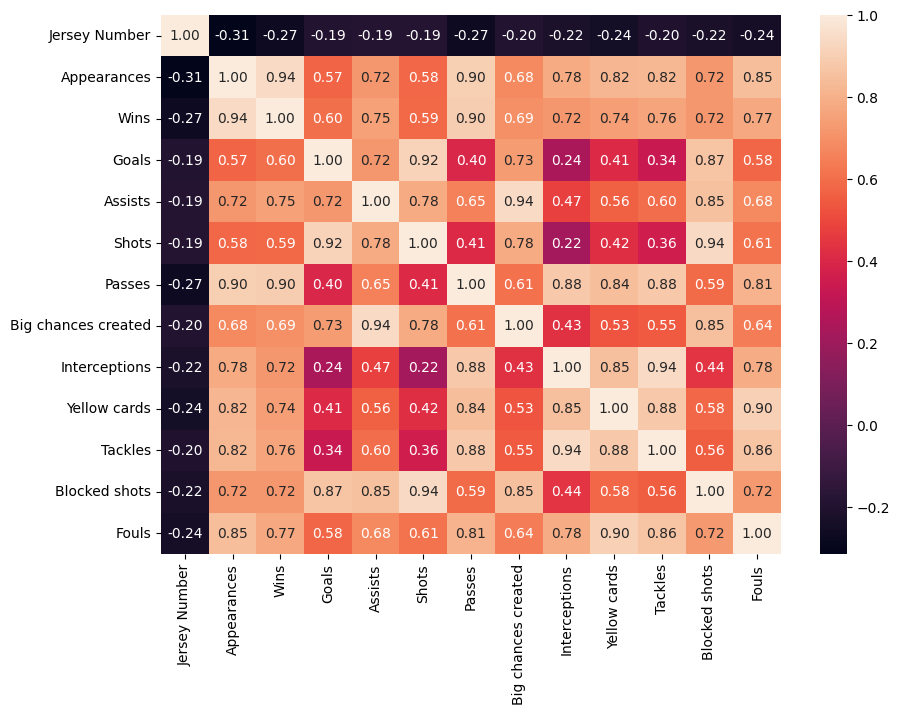

In [38]:
plt.figure(figsize=(10,7))

corr = dfJersey.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

#Model Prediksi

###3 Variabel

In [21]:
#menentukan variabel bebas dan terikat
bebas1 = ['Goals', 'Assists', 'Shots']

X = dfbaru[bebas1]
y = dfbaru['Wins']

In [22]:
#split dataset menjadi 2 (train dan test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [23]:
print(X_train.shape)
print(X_test.shape)

(456, 3)
(115, 3)


In [24]:
#Model regresi
regr =  LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
#mendapat nilai coef & intercept
print('intercept', regr.intercept_)
print('Coef', regr.coef_)

intercept 13.271516483197965
Coef [ 0.83547009  2.8670428  -0.10638117]


In [26]:

pred = regr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [27]:
rmse

20.98306861192635

###7 Variabel

In [28]:
#menentukan variabel bebas dan terikat
bebas2 = ['Goals', 'Assists', 'Shots', 'Interceptions','Yellow cards', 'Tackles','Blocked shots']

X2 = dfbaru[bebas2]
y2 = dfbaru['Wins']

In [29]:
#split dataset menjadi 2 (train dan test)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=100)

In [30]:
print(X2_train.shape)
print(X2_test.shape)

(456, 7)
(115, 7)


In [31]:
#Model regresi
regr =  LinearRegression()
regr.fit(X2_train, y2_train)

LinearRegression()

In [32]:
#mendapat nilai coef & intercept
print('intercept', regr.intercept_)
print('Coef', regr.coef_)

intercept 6.0764243303960015
Coef [ 0.60959165  1.28435268 -0.09441406  0.1475665   0.48691533 -0.01531626
  0.27892578]


In [33]:
pred = regr.predict(X2_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y2_test), pred))

In [34]:
rmse

15.836976547562323